# Applied Data Science - Capstone Project

In this project, I will find out the best neighborhood in Hyderabad for enterpreneurs to open a new Chinese Restaurant.
Various steps that are involved in this process are as follows:
- 1)Data Collection
- 2)Data Preprocessing
- 3)Data Visualization
- 4)Clustering
- 5)Analysis of results

## Data Collection

Using multiple datasets from different sources
- Web
- GeoCode
- CSV files
- Foursquare API

In [2]:
!pip install folium
!pip install geopy

     |████████████████████████████████| 93 kB 2.8 MB/s eta 0:00:011


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import geopy
import requests
import json
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors

In [4]:
# @hide
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_3592f7216433436a9515dc3ee6db9574 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='2JSmy3j0LV9OksW2PkOLV34CZUmiAsatIaQynITbBYFQ',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')
# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_1 = client_3592f7216433436a9515dc3ee6db9574.get_object(Bucket='datascience-donotdelete-pr-pxpsdwurczmshk', Key='data_online.html')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(streaming_body_1, "__iter__"): streaming_body_1.__iter__ = types.MethodType( __iter__, streaming_body_1 ) 


In [5]:
data_online= pd.read_html(streaming_body_1)

## Data Preprocessing

In [6]:
h = []
for i in range(0,5):
    a = data_online[i]
    a = a.drop([0])   
    new_header = a.iloc[0]
    a = a[1:]
    a.columns = new_header
    a = a.drop('Circle No.',axis='columns')
    h.append(a)

In [8]:
hyd_data = pd.concat(h)
hyd_data.rename(columns={"Name of the Zone / Circle":"Zone","Name of the ward":"Neighborhood","Population of Election Ward":"Population","Election Ward No.":"Area Code"},inplace=True)
hyd_data.set_index(["Area Code"],inplace=True,append=True,drop=True)
hyd_data.columns.name = None
hyd_data.index = hyd_data.index.droplevel(level=0)

In [9]:
hyd_data.head()

Zone Neighborhood Population
Area Code                                     
1                Kapra        Kapra      32108
2                Kapra  Cherlapalli      34729
3                Kapra     Mallapur      39842
4                Kapra     Nacharam      39793
5          Uppal Kalan        Uppal      40638

Clean the data in order to get geo-cordinates

In [10]:
hyd_data = hyd_data.replace('Cherlapalli','Cherlapally')
hyd_data = hyd_data.replace('Vansathalipuram','Vanasthalipuram')
hyd_data = hyd_data.replace('Rama Krishna Puram','RamaKrishnaPuram')
hyd_data = hyd_data.replace('Santoshnagar','Santosh nagar')
hyd_data = hyd_data.replace('Rain Bazar','Rein Bazar')
hyd_data = hyd_data.replace('Akberbagh','Akbarbagh')
hyd_data = hyd_data.replace('Talabchanchalam','Talab chanchalam')
hyd_data = hyd_data.replace('Nawabsaheb Kunta','Nawab saheb Kunta')
hyd_data = hyd_data.replace('Fathe Darwaza','Fateh Darwaza')
hyd_data = hyd_data.replace('Shali Banda','ShaliBanda')
hyd_data = hyd_data.replace('Hussain Alam','Hussaini Alam')
hyd_data = hyd_data.replace('Gosha Mahal','GoshaMahal')
hyd_data = hyd_data.replace('Puranapul','Puranapool')
hyd_data = hyd_data.replace('Shivarampally','Shivarampalli')
hyd_data = hyd_data.replace('Mylardevpally','Mailardevpally')
hyd_data = hyd_data.replace('Dattathreyanagar','Dattatreya nagar')
hyd_data = hyd_data.replace('Manghalhat','Mangalhat')
hyd_data = hyd_data.replace('Lunger House','Langer House')
hyd_data = hyd_data.replace('Tolichowli','Tolichowki')
hyd_data = hyd_data.replace('Chintalbasti','Chintal basti')
hyd_data = hyd_data.replace('Rahamath Nagar','Rahmat Nagar')
hyd_data = hyd_data.replace('Rama Chandra Puram','RamaChandraPuram')
hyd_data = hyd_data.replace('Fathe Nagar','Fateh Nagar')
hyd_data = hyd_data.replace('Jagadgiri gutta','Jagadgirigutta')
hyd_data = hyd_data.replace('Suraram Colony','Suraram')
hyd_data = hyd_data.replace('Macha Bollaram','Macha Bolarum')
hyd_data = hyd_data.replace('Bansilalpet','bansilapet')
hyd_data = hyd_data.replace('Ramgopal pet','Ramgopalpet')
hyd_data = hyd_data.replace('Noorkhan Bazar','Noorkhan Bazaar')
hyd_data = hyd_data.replace('Vengalrao Nagar','Vengal rao Nagar')

Get the latitude and longitude data by using geopy 

In [12]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="hyd_ds")

lat = []
long = []

for n in hyd_data['Neighborhood']:
    k = n + ',Hyderabad'  
    geo = geolocator.geocode(k)
    #print(geo)
    lat.append(round(geo.latitude,4))
    long.append(round(geo.longitude,4))   

In [13]:
hyd_data['latitude'] = lat
hyd_data['longitude'] = long
hyd_data.head()

Zone Neighborhood Population  latitude  longitude
Area Code                                                          
1                Kapra        Kapra      32108   17.4846    78.5610
2                Kapra  Cherlapally      34729   17.4687    78.6025
3                Kapra     Mallapur      39842   17.4405    78.5789
4                Kapra     Nacharam      39793   17.4285    78.5528
5          Uppal Kalan        Uppal      40638   17.4025    78.5613

In [14]:
hyd_data.groupby('Zone').count()['Neighborhood']

Zone
Alwal                                                                                                                3
Erstwhile Circle – I (Areas under Moosarambagh, Saidabad, Saroornagar, Barkas, Moghalpura, Chaderghat etc.)         25
Erstwhile Circle – II (Areas under Falaknuma, Zoo Park, Puranapul, Begum Bazaar, Shali Banda etc.)                  14
Erstwhile Circle – III (Areas under Amberpet, Kachiguda, Himayathnagar, Bholakpur, Nallakunta etc.)                 16
Erstwhile Circle – IV (Areas under Golkonda military area, Hakimpet, Mehdipatnam, Mallepally, Langer house etc.)    16
Erstwhile Circle – V (Areas under Jubilee hills, Banjara hills, Yousufguda, Sanathnagar, Khairatabad etc.)          15
Erstwhile Circle – VI (Areas under Esamia Bazaar, Agapura, Gun Foundry etc.)                                         3
Kapra                                                                                                                4
Kukatpally                                 

In [15]:
zones = hyd_data['Zone'].unique().tolist()

In [16]:
zones

['Kapra',
 'Uppal Kalan',
 'L.B. Nagar/Gaddiannaram',
 'Erstwhile Circle – I (Areas under Moosarambagh, Saidabad, Saroornagar, Barkas, Moghalpura, Chaderghat etc.)',
 'Erstwhile Circle – II (Areas under Falaknuma, Zoo Park, Puranapul, Begum Bazaar, Shali Banda etc.)',
 'Rajendra Nagar',
 'Erstwhile Circle – IV (Areas under Golkonda military area, Hakimpet, Mehdipatnam, Mallepally, Langer house etc.)',
 'Erstwhile Circle – VI (Areas under Esamia Bazaar, Agapura, Gun Foundry etc.)',
 'Erstwhile Circle – III (Areas under Amberpet, Kachiguda, Himayathnagar, Bholakpur, Nallakunta etc.)',
 'Erstwhile Circle – V (Areas under Jubilee hills, Banjara hills, Yousufguda, Sanathnagar, Khairatabad etc.)',
 'Serilingampally (North & South)',
 'Ramachandra Puram',
 'Patancheru',
 'Kukatpally',
 'Qutu-bullapur',
 'Alwal',
 'Malkajgiri',
 'Secunderabad Division']

In [17]:
lat_hyd = hyd_data['latitude'].mean()
lon_hyd = hyd_data['longitude'].mean()
print('The geographical coordinates of Hyderabad are {}, {}'.format(lat_hyd, lon_hyd))

The geographical coordinates of Hyderabad are 17.405122000000002, 78.47771533333332


In [18]:
zone_color = {}
for zone in zones:
    zone_color[zone]= '#%02X%02X%02X' % tuple(np.random.choice(range(256), size=3)) #Random color

## Data Visualization

In [20]:
map_hyd = folium.Map(location=[lat_hyd, lon_hyd], zoom_start=10.5)

# add markers to map
for lat, lng, zone, neighborhood in zip(hyd_data['latitude'], 
                                        hyd_data['longitude'],
                                        hyd_data['Zone'], 
                                        hyd_data['Neighborhood']):
    label_text = zone + ' - ' + neighborhood
    label = folium.Popup(label_text)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=zone_color[zone],
        fill_color=zone_color[zone],
        fill_opacity=0.8).add_to(map_hyd)  
    
map_hyd

In [48]:
CLIENT_ID = 'GTKKPMIM4SS53MT1YADQXEFXL0CZORVFGAQ12WZVINJ0Z3GT' # your Foursquare ID
CLIENT_SECRET = 'KCSOREEBPXWRTCXJIZJTD5JX4H5Q3G1YDFJQ4GCCFMUQO2O5' # your Foursquare Secret
VERSION = '20180605'

In [49]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [50]:
from pandas.io.json import json_normalize # tranform JSON into pandas dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

radius = 1000
LIMIT = 100
venues_list = []

for lat, long, Neigh in zip(hyd_data.latitude, hyd_data.longitude,  hyd_data.Neighborhood):
                           
        # Foursqaure API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            long, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each venue
        for venue in results:
            venues_list.append((
                Neigh,
                lat, 
                long, 
                venue['venue']['name'], 
                venue['venue']['location']['lat'], 
                venue['venue']['location']['lng'],  
                venue['venue']['categories'][0]['name']))

In [51]:
hyd_venues = pd.DataFrame(venues_list)
hyd_venues.columns = ['Neighbourhood', 'Neighbourhood Latitude', 'Neighbourhood Longitude', 'Venue Name', 'Venue Latitude', 'Venue Longitude', 'Venue Category']

In [52]:
print('{} venues were returned by Foursquare.'.format(hyd_venues.shape[0]))

1974 venues were returned by Foursquare.


In [53]:
hyd_venues.head()

Neighbourhood  Neighbourhood Latitude  Neighbourhood Longitude  \
0         Kapra                 17.4846                   78.561   
1         Kapra                 17.4846                   78.561   
2         Kapra                 17.4846                   78.561   
3         Kapra                 17.4846                   78.561   
4         Kapra                 17.4846                   78.561   

            Venue Name  Venue Latitude  Venue Longitude        Venue Category  
0       The Coffee Cup       17.483180        78.552104                  Café  
1      Cafe Coffee Day       17.481262        78.555077                  Café  
2  Parivaar Restaurant       17.476850        78.563525     Indian Restaurant  
3           McDonald's       17.476961        78.564754  Fast Food Restaurant  
4        Swagath Grand       17.482022        78.553261     Indian Restaurant

In [54]:
hyd_venues.groupby('Neighbourhood').count()

Neighbourhood Latitude  Neighbourhood Longitude  \
Neighbourhood                                                               
Addagutta                                      5                        5   
Adikmet                                       13                       13   
Ahmed Nagar                                   40                       40   
Akbarbagh                                      5                        5   
Aliabad                                        9                        9   
Alwal                                          5                        5   
Amberpet                                       6                        6   
Ameerpet                                      42                       42   
Asifnagar                                      4                        4   
Attapur                                        6                        6   
Azampura                                      12                       12   
Bagh Amberpet                                 11                       11   
Bagh Lingampally                              17                       17   
Balkampet                                     11                       11   
Banjara Hills                                 55                       55   
Barkas                                         4                        4   
Barkatpura                                    18                       18   
Begum Bazar                                    9                        9   
Begumpet                                      21                       21   
Bholakpur                                     10                       10   
Borabanda                                      5                        5   
Boudha Nagar                                   6                        6   
Champapet                                      5                        5   
Chanda Nagar                                  10                       10   
Chandrayan gutta                               5                        5   
Chavni                                         4                        4   
Cherlapally                                    1                        1   
Chilkalguda                                    8                        8   
Chintal                                        6                        6   
Chintal basti                                 69                       69   
Dabeerpura                                     6                        6   
Dhoolpet                                       4                        4   
Domalguda                                     36                       36   
Doodbowli                                      5                        5   
Erragadda                                      5                        5   
Falaknuma                                      5                        5   
Fateh Darwaza                                  6                        6   
Fateh Nagar                                    5                        5   
Gachibowli                                    42                       42   
Gaddiannaram                                   6                        6   
Gajula Ramaram                                 6                        6   
Gandhinagar                                   55                       55   
Gautham Nagar                                  4                        4   
Ghansi Bazar                                   9                        9   
Golnaka                                       14                       14   
GoshaMahal                                    12                       12   
Gowlipura                                      7                        7   
Gudimalkapur                                  12                       12   
Gunfoundry                                    36                       36   
Habsiguda                                     16                       16   
Hafeezpet             

In [55]:
print('There are {} uniques categories.'.format(len(hyd_venues['Venue Category'].unique())))

There are 166 uniques categories.


In [56]:
print("The Venue Categories are", hyd_venues['Venue Category'].unique())

The Venue Categories are ['Café' 'Indian Restaurant' 'Fast Food Restaurant' 'Diner'
 'Department Store' 'Electronics Store' 'Farm' 'ATM' 'Movie Theater'
 'Pizza Place' 'Supermarket' 'Light Rail Station' 'Chinese Restaurant'
 'Bus Station' 'Flea Market' 'Sandwich Place' 'Bakery' 'Park' 'Restaurant'
 'Metro Station' 'Vegetarian / Vegan Restaurant' 'Bank'
 'Photography Studio' 'Hotel' 'Motorcycle Shop' 'Ice Cream Shop'
 'Hookah Bar' 'Breakfast Spot' 'Italian Restaurant'
 'Rajasthani Restaurant' 'Dessert Shop' 'American Restaurant'
 'Asian Restaurant' 'Bowling Alley' 'Pub' 'Concert Hall'
 'Middle Eastern Restaurant' 'Multiplex' 'Clothing Store' 'Food'
 'Shopping Mall' 'Coffee Shop' 'Lounge' 'Fried Chicken Joint' 'Cafeteria'
 'Gym / Fitness Center' 'Bookstore' 'South Indian Restaurant'
 'Convenience Store' 'Optical Shop' 'Bar' 'Pharmacy' 'Garden Center'
 'Hyderabadi Restaurant' 'Farmers Market' 'Stadium' 'Lake' 'Train Station'
 'Hotel Bar' 'Burger Joint' 'Smoke Shop' 'Mattress Store'
 'Medi

In [57]:
"Chinese Restaurant" in hyd_venues['Venue Category'].unique()

True

In [58]:
# one hot encoding
to_onehot = pd.get_dummies(hyd_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
to_onehot['Neighbourhoods'] = hyd_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [to_onehot.columns[-1]] + list(to_onehot.columns[:-1])
to_onehot = to_onehot[fixed_columns]

print(to_onehot.shape)
to_onehot.head()

(1974, 167)


Neighbourhoods  ATM  Accessories Store  Afghan Restaurant  \
0          Kapra    0                  0                  0   
1          Kapra    0                  0                  0   
2          Kapra    0                  0                  0   
3          Kapra    0                  0                  0   
4          Kapra    0                  0                  0   

   American Restaurant  Arcade  Asian Restaurant  Athletics & Sports  \
0                    0       0                 0                   0   
1                    0       0                 0                   0   
2                    0       0                 0                   0   
3                    0       0                 0                   0   
4                    0       0                 0                   0   

   Auto Garage  BBQ Joint  Bakery  Bank  Bar  Basketball Court  \
0            0          0       0     0    0                 0   
1            0          0       0     0    0                 0   
2            0          0       0     0    0                 0   
3            0          0       0     0    0                 0   
4            0          0       0     0    0                 0   

   Bengali Restaurant  Bistro  Boat or Ferry  Bookstore  Boutique  \
0                   0       0              0          0         0   
1                   0       0              0          0         0   
2                   0       0              0          0         0   
3                   0       0              0          0         0   
4                   0       0              0          0         0   

   Bowling Alley  Breakfast Spot  Brewery  Bridal Shop  Burger Joint  \
0              0               0        0            0             0   
1              0               0        0            0             0   
2              0               0        0            0             0   
3              0               0        0            0             0   
4              0               0        0            0             0   

   Bus Station  Bus Stop  Business Service  Butcher  Cable Car  Cafeteria  \
0            0         0                 0        0          0          0   
1            0         0                 0        0          0          0   
2            0         0                 0        0          0          0   
3            0         0                 0        0          0          0   
4            0         0                 0        0          0          0   

   Café  Candy Store  Chaat Place  Cheese Shop  Chinese Restaurant  \
0     1            0            0            0                   0   
1     1            0            0            0                   0   
2     0            0            0            0                   0   
3     0            0            0            0                   0   
4     0            0            0            0                   0   

   Clothing Store  Cocktail Bar  Coffee Shop  Comfort Food Restaurant  \
0               0             0            0                        0   
1               0             0            0                        0   
2               0             0            0                        0   
3               0             0            0                        0   
4               0             0            0                        0   

   Concert Hall  Convenience Store  Cricket Ground  Cupcake Shop  \
0             0                  0               0             0   
1             0                  0               0             0   
2             0                  0               0             0   
3             0                  0               0             0   
4             0                  0               0             0   

   Deli / Bodega  Department Store  Dessert Shop  Diner  Discount Store  \
0              0                 0             0      0               0   
1              0                 0             0      0        

In [60]:
to_grouped = to_onehot.groupby(["Neighbourhoods"]).mean().reset_index()

print(to_grouped.shape)
to_grouped.head()

(145, 167)


Neighbourhoods  ATM  Accessories Store  Afghan Restaurant  \
0      Addagutta  0.0                0.0                0.0   
1        Adikmet  0.0                0.0                0.0   
2    Ahmed Nagar  0.0                0.0                0.0   
3      Akbarbagh  0.0                0.0                0.0   
4        Aliabad  0.0                0.0                0.0   

   American Restaurant  Arcade  Asian Restaurant  Athletics & Sports  \
0                  0.0     0.0          0.000000                 0.0   
1                  0.0     0.0          0.076923                 0.0   
2                  0.0     0.0          0.025000                 0.0   
3                  0.0     0.0          0.000000                 0.0   
4                  0.0     0.0          0.111111                 0.0   

   Auto Garage  BBQ Joint  Bakery  Bank  Bar  Basketball Court  \
0     0.000000        0.0   0.200   0.0  0.0               0.0   
1     0.000000        0.0   0.000   0.0  0.0               0.0   
2     0.000000        0.0   0.025   0.0  0.0               0.0   
3     0.000000        0.0   0.200   0.0  0.0               0.0   
4     0.111111        0.0   0.000   0.0  0.0               0.0   

   Bengali Restaurant  Bistro  Boat or Ferry  Bookstore  Boutique  \
0                 0.0   0.000            0.0      0.000       0.0   
1                 0.0   0.000            0.0      0.000       0.0   
2                 0.0   0.025            0.0      0.025       0.0   
3                 0.0   0.000            0.0      0.000       0.0   
4                 0.0   0.000            0.0      0.000       0.0   

   Bowling Alley  Breakfast Spot  Brewery  Bridal Shop  Burger Joint  \
0            0.0             0.2      0.0          0.0           0.0   
1            0.0             0.0      0.0          0.0           0.0   
2            0.0             0.0      0.0          0.0           0.0   
3            0.0             0.0      0.0          0.0           0.0   
4            0.0             0.0      0.0          0.0           0.0   

   Bus Station  Bus Stop  Business Service  Butcher  Cable Car  Cafeteria  \
0          0.0       0.0               0.0      0.0        0.0        0.0   
1          0.0       0.0               0.0      0.0        0.0        0.0   
2          0.0       0.0               0.0      0.0        0.0        0.0   
3          0.0       0.0               0.0      0.0        0.0        0.0   
4          0.0       0.0               0.0      0.0        0.0        0.0   

       Café  Candy Store  Chaat Place  Cheese Shop  Chinese Restaurant  \
0  0.000000          0.0        0.000          0.0            0.000000   
1  0.076923          0.0        0.000          0.0            0.000000   
2  0.125000          0.0        0.025          0.0            0.050000   
3  0.200000          0.0        0.000          0.0            0.000000   
4  0.111111          0.0        0.000          0.0            0.111111   

   Clothing Store  Cocktail Bar  Coffee Shop  Comfort Food Restaurant  \
0        0.000000           0.0     0.000000                      0.0   
1        0.076923           0.0     0.153846                      0.0   
2        0.000000           0.0     0.000000                      0.0   
3        0.000000           0.0     0.000000                      0.0   
4        0.000000           0.0     0.000000                      0.0   

   Concert Hall  Convenience Store  Cricket Ground  Cupcake Shop  \
0           0.0           0.000000             0.0           0.0   
1           0.0           0.076923             0.0           0.0   
2           0.0           0.000000             0.0           0.0   
3           0.0           0.000000             0.0           0.0   
4           0.0           0.000000             0.0           0.0   

   Deli / Bodega  Department Store  Dessert Shop  Diner  Discount Store  \
0            0.0             0.000           0.0    0.0             0.0   
1            0.0             0.000     

In [61]:
chinese = to_grouped[["Neighbourhoods","Chinese Restaurant"]]
chinese.head()

Neighbourhoods  Chinese Restaurant
0      Addagutta            0.000000
1        Adikmet            0.000000
2    Ahmed Nagar            0.050000
3      Akbarbagh            0.000000
4        Aliabad            0.111111

In [62]:
chinese = chinese.rename(columns={"Neighbourhoods":"Neighbourhood"})

## Cluster the Neighborhoods

In [64]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=15, random_state=8)
X = chinese.drop(['Neighbourhood'], axis=1)

In [65]:
kmeans.fit(X)
kmeans.labels_[0:10]

array([0, 0, 2, 0, 2, 0, 0, 2, 0, 0], dtype=int32)

In [66]:
def get_inertia(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=15, random_state=8)
    km.fit(X)
    return km.inertia_

In [67]:
scores = [get_inertia(x) for x in range(2, 21)]

Text(0, 0.5, 'Error')

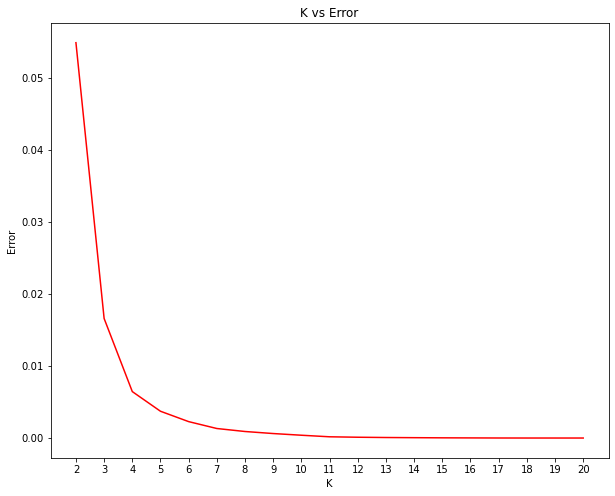

In [70]:
plt.figure(figsize=[10, 8])
sns.lineplot(x=range(2, 21), y=scores, color='r')
plt.title("K vs Error")
plt.xticks(range(2, 21))
plt.xlabel("K")
plt.ylabel("Error")

In [72]:
!pip install yellowbrick

     |████████████████████████████████| 269 kB 18.9 MB/s eta 0:00:01


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


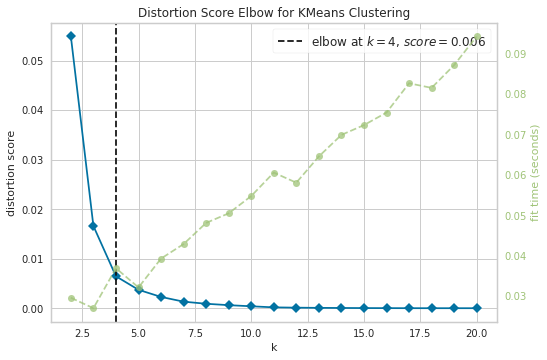

In [73]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,21))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

In [74]:
kclusters = 4

hyd_grouped_clustering = chinese.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(hyd_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 3, 1, 0, 1, 1, 3, 1, 1], dtype=int32)

In [75]:
to_merged = chinese.copy()

# add clustering labels
to_merged["Cluster Labels"] = kmeans.labels_

In [76]:
to_merged.head()

Neighbourhood  Chinese Restaurant  Cluster Labels
0     Addagutta            0.000000               1
1       Adikmet            0.000000               1
2   Ahmed Nagar            0.050000               3
3     Akbarbagh            0.000000               1
4       Aliabad            0.111111               0

In [77]:
to_merged = to_merged.join(hyd_venues.set_index("Neighbourhood"), on="Neighbourhood")

print(to_merged.shape)
to_merged.head()

(1974, 9)


Neighbourhood  Chinese Restaurant  Cluster Labels  Neighbourhood Latitude  \
0     Addagutta                 0.0               1                 17.4464   
0     Addagutta                 0.0               1                 17.4464   
0     Addagutta                 0.0               1                 17.4464   
0     Addagutta                 0.0               1                 17.4464   
0     Addagutta                 0.0               1                 17.4464   

   Neighbourhood Longitude          Venue Name  Venue Latitude  \
0                  78.5177  Ramco Distributors       17.453523   
0                  78.5177      Iyengar Bakery       17.450861   
0                  78.5177       lalaguda gate       17.441002   
0                  78.5177        Lal Bawarchi       17.440900   
0                  78.5177      Geetha Tiffins       17.446764   

   Venue Longitude          Venue Category  
0        78.517631  Furniture / Home Store  
0        78.510350                  Bakery  
0        78.524325           Train Station  
0        78.524536       Indian Restaurant  
0        78.508353          Breakfast Spot

In [78]:
print(to_merged.shape)
to_merged.sort_values(["Cluster Labels"], inplace=True)
to_merged

(1974, 9)


Neighbourhood  Chinese Restaurant  Cluster Labels  \
32                  Domalguda            0.083333               0   
52              Himayathnagar            0.088889               0   
52              Himayathnagar            0.088889               0   
52              Himayathnagar            0.088889               0   
52              Himayathnagar            0.088889               0   
52              Himayathnagar            0.088889               0   
52              Himayathnagar            0.088889               0   
52              Himayathnagar            0.088889               0   
52              Himayathnagar            0.088889               0   
52              Himayathnagar            0.088889               0   
52              Himayathnagar            0.088889               0   
52              Himayathnagar            0.088889               0   
52              Himayathnagar            0.088889               0   
52              Himayathnagar            0.088889               0   
52              Himayathnagar            0.088889               0   
52              Himayathnagar            0.088889               0   
52              Himayathnagar            0.088889               0   
52              Himayathnagar            0.088889               0   
52              Himayathnagar            0.088889               0   
52              Himayathnagar            0.088889               0   
52              Himayathnagar            0.088889               0   
52              Himayathnagar            0.088889               0   
52              Himayathnagar            0.088889               0   
134                Tolichowki            0.083333               0   
134                Tolichowki            0.083333               0   
134                Tolichowki            0.083333               0   
134                Tolichowki            0.083333               0   
134                Tolichowki            0.083333               0   
134                Tolichowki            0.083333               0   
134                Tolichowki            0.083333               0   
133                   Tarnaka            0.100000               0   
133                   Tarnaka            0.100000               0   
133                   Tarnaka            0.100000               0   
133                   Tarnaka            0.100000               0   
133                   Tarnaka            0.100000               0   
133                   Tarnaka            0.100000               0   
133                   Tarnaka            0.100000               0   
133                   Tarnaka            0.100000               0   
133                   Tarnaka            0.100000               0   
133                   Tarnaka            0.100000               0   
52              Himayathnagar            0.088889               0   
52              Himayathnagar            0.088889               0   
52              Himayathnagar            0.088889               0   
134                Tolichowki            0.083333               0   
52              Himayathnagar            0.088889               0   
52              Himayathnagar            0.088889               0   
81                Marredpally            0.071429               0   
81                Marredpally            0.071429               0   
81                Marredpally            0.071429               0   
32                  Domalguda            0.083333               0   
44                    Golnaka            0.071429               0   
44                    Golnaka            0.071429               0   
44                    Golnaka            0.071429               0   
44                    Golnaka            0.071429               0   
81                Marredpally            0.071429               0   
44                    Golnaka            0.071429               0   
44                    Golnaka            0.071429               0   
44            

In [79]:
to_merged['Venue Category'].value_counts()['Chinese Restaurant']

47

In [80]:
map_clusters = folium.Map(location=[lat_hyd, lon_hyd], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(to_merged['Neighbourhood Latitude'], to_merged['Neighbourhood Longitude'], to_merged['Neighbourhood'], to_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster))
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

In [81]:
chinese["Cluster Labels"] = kmeans.labels_
chinese.head()

Neighbourhood  Chinese Restaurant  Cluster Labels
0     Addagutta            0.000000               1
1       Adikmet            0.000000               1
2   Ahmed Nagar            0.050000               3
3     Akbarbagh            0.000000               1
4       Aliabad            0.111111               0

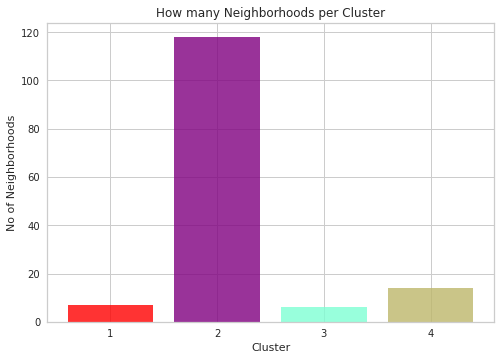

In [82]:
objects = (1,2,3,4)
y_pos = np.arange(len(objects))
performance = chinese['Cluster Labels'].value_counts().to_frame().sort_index(ascending=True)
perf = performance['Cluster Labels'].tolist()
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','aquamarine', 'darkkhaki'])
plt.xticks(y_pos, objects)
plt.ylabel('No of Neighborhoods')
plt.xlabel('Cluster')
plt.title('How many Neighborhoods per Cluster')

plt.show()

In [84]:
chinese['Cluster Labels'].value_counts()

1    118
3     14
0      7
2      6
Name: Cluster Labels, dtype: int64

### Analysis of each cluster

In [90]:
df_new = hyd_data[['Zone','Neighborhood']]
df_new = df_new.rename(columns={"Neighborhood":"Neighbourhood"})

### Cluster 1

In [108]:
#red
cluster1 = to_merged.loc[to_merged['Cluster Labels'] == 0]
df_cluster1 = pd.merge(df_new, cluster1, on='Neighbourhood')
df_cluster1.groupby('Neighbourhood').count().sort_values(["Chinese Restaurant"], ascending=False)

Zone  Chinese Restaurant  Cluster Labels  \
Neighbourhood                                             
Himayathnagar    45                  45              45   
Domalguda        36                  36              36   
Golnaka          14                  14              14   
Marredpally      14                  14              14   
Tolichowki       12                  12              12   
Tarnaka          10                  10              10   
Aliabad           9                   9               9   

               Neighbourhood Latitude  Neighbourhood Longitude  Venue Name  \
Neighbourhood                                                                
Himayathnagar                      45                       45          45   
Domalguda                          36                       36          36   
Golnaka                            14                       14          14   
Marredpally                        14                       14          14   
Tolichowki                         12                       12          12   
Tarnaka                            10                       10          10   
Aliabad                             9                        9           9   

               Venue Latitude  Venue Longitude  Venue Category  
Neighbourhood                                                   
Himayathnagar              45               45              45  
Domalguda                  36               36              36  
Golnaka                    14               14              14  
Marredpally                14               14              14  
Tolichowki                 12               12              12  
Tarnaka                    10               10              10  
Aliabad                     9                9               9

### Cluster 2

In [114]:
#purple
cluster2 = to_merged.loc[to_merged['Cluster Labels'] == 1]
df_cluster2= pd.merge(df_new, cluster2, on='Neighbourhood')
df_cluster2.groupby('Neighbourhood').count().sort_values(["Chinese Restaurant"], ascending=False)


Zone  Chinese Restaurant  Cluster Labels  \
Neighbourhood                                                        
Jubilee Hills               73                  73              73   
Chintal basti               69                  69              69   
Somajiguda                  59                  59              59   
Banjara Hills               55                  55              55   
Ramgopalpet                 36                  36              36   
Red Hills                   34                  34              34   
Khairtabad                  34                  34              34   
Jambagh                     23                  23              23   
Mehdipatnam                 20                  20              20   
Kukatpally                  19                  19              19   
Bagh Lingampally            17                  17              17   
Habsiguda                   16                  16              16   
Saroornagar                 16                  16              16   
Nallakunta                  15                  15              15   
Nanalnagar                  15                  15              15   
Kachiguda                   15                  15              15   
Yousufguda                  15                  15              15   
Vengal rao Nagar            15                  15              15   
Vivekananda Nagar Colony    14                  14              14   
Sultan Bazar                13                  13              13   
Kavadiguda                  13                  13              13   
Pathergatti                 13                  13              13   
Adikmet                     13                  13              13   
GoshaMahal                  12                  12              12   
Gudimalkapur                12                  12              12   
Vidyanagar                  12                  12              12   
Azampura                    12                  12              12   
Hydernagar                  11                  11              11   
Moghalpura                  11                  11              11   
Bagh Amberpet               11                  11              11   
Balkampet                   11                  11              11   
Karwan                      11                  11              11   
Bholakpur                   10                  10              10   
Old Malakpet                10                  10              10   
Padmarao Nagar               9                   9               9   
Begum Bazar                  9                   9               9   
bansilapet                   9                   9               9   
Ghansi Bazar                 9                   9               9   
Saleem Nagar                 8                   8               8   
Kapra                        8                   8               8   
Noorkhan Bazaar              8                   8               8   
Hussaini Alam                8                   8               8   
Chilkalguda                  8                   8               8   
Old Bowenpally               8                   8               8   
Old Malkajgiri               8                   8               8   
Seethaphalmandi              8                   8               8   
Mothinagar                   7                   7               7   
Sanathnagar                  7                   7               7   
Puranapool                   7                   7               7   
Saidabad                     7                   7               7   
ShaliBanda                   7                   7               7   
Gowlipura                    7                   7               7   
Jeedimetla                   7                   7               7   
Karmanghat                   6                   6               6   
Moosarambagh                 6                   6               6   
Boudha Nagar                 6      

### Cluster 3

In [106]:
#Aquamarine
cluster3 = to_merged.loc[to_merged['Cluster Labels'] == 2]
df_cluster3 = pd.merge(df_new, cluster3, on='Neighbourhood')
df_cluster3.groupby('Neighbourhood').count().sort_values(["Chinese Restaurant"], ascending=False)

Zone  Chinese Restaurant  Cluster Labels  \
Neighbourhood                                             
Mettuguda        12                  12              12   
Chanda Nagar     10                  10              10   
Musheerabad       7                   7               7   
Doodbowli         5                   5               5   
Jahanuma          5                   5               5   
Uppal             5                   5               5   

               Neighbourhood Latitude  Neighbourhood Longitude  Venue Name  \
Neighbourhood                                                                
Mettuguda                          12                       12          12   
Chanda Nagar                       10                       10          10   
Musheerabad                         7                        7           7   
Doodbowli                           5                        5           5   
Jahanuma                            5                        5           5   
Uppal                               5                        5           5   

               Venue Latitude  Venue Longitude  Venue Category  
Neighbourhood                                                   
Mettuguda                  12               12              12  
Chanda Nagar               10               10              10  
Musheerabad                 7                7               7  
Doodbowli                   5                5               5  
Jahanuma                    5                5               5  
Uppal                       5                5               5

### Cluster 4

In [105]:
#darkKhaki
cluster4 = to_merged.loc[to_merged['Cluster Labels'] == 3]
df_cluster4 = pd.merge(df_new, cluster4, on='Neighbourhood')
df_cluster4.groupby('Neighbourhood').count().sort_values(["Chinese Restaurant"], ascending=False)

Zone  Chinese Restaurant  Cluster Labels  \
Neighbourhood                                               
Panjagutta         71                  71              71   
Gandhinagar        55                  55              55   
Kothapet           55                  55              55   
Muradnagar         55                  55              55   
Ramnagar           55                  55              55   
Shaikpet           55                  55              55   
Srinagar Colony    48                  48              48   
Ameerpet           42                  42              42   
Gachibowli         42                  42              42   
Ahmed Nagar        40                  40              40   
KPHB Colony        37                  37              37   
Gunfoundry         36                  36              36   
Begumpet           21                  21              21   
Barkatpura         18                  18              18   

                 Neighbourhood Latitude  Neighbourhood Longitude  Venue Name  \
Neighbourhood                                                                  
Panjagutta                           71                       71          71   
Gandhinagar                          55                       55          55   
Kothapet                             55                       55          55   
Muradnagar                           55                       55          55   
Ramnagar                             55                       55          55   
Shaikpet                             55                       55          55   
Srinagar Colony                      48                       48          48   
Ameerpet                             42                       42          42   
Gachibowli                           42                       42          42   
Ahmed Nagar                          40                       40          40   
KPHB Colony                          37                       37          37   
Gunfoundry                           36                       36          36   
Begumpet                             21                       21          21   
Barkatpura                           18                       18          18   

                 Venue Latitude  Venue Longitude  Venue Category  
Neighbourhood                                                     
Panjagutta                   71               71              71  
Gandhinagar                  55               55              55  
Kothapet                     55               55              55  
Muradnagar                   55               55              55  
Ramnagar                     55               55              55  
Shaikpet                     55               55              55  
Srinagar Colony              48               48              48  
Ameerpet                     42               42              42  
Gachibowli                   42               42              42  
Ahmed Nagar                  40               40              40  
KPHB Colony                  37               37              37  
Gunfoundry                   36               36              36  
Begumpet                     21               21              21  
Barkatpura                   18               18              18

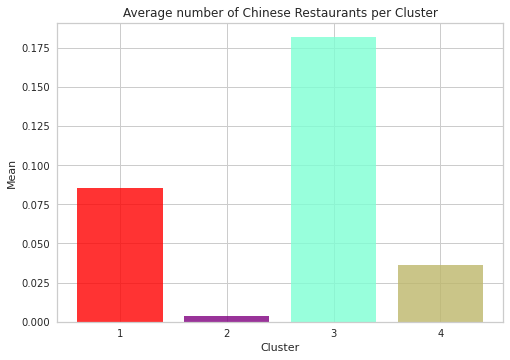

In [102]:
clusters_mean = [df_cluster1['Chinese Restaurant'].mean(),df_cluster2['Chinese Restaurant'].mean(),df_cluster3['Chinese Restaurant'].mean(),
                 df_cluster4['Chinese Restaurant'].mean()]
objects = (1,2,3,4)
y_pos = np.arange(len(objects))
perf = clusters_mean
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','aquamarine', 'darkkhaki'])
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.xlabel('Cluster')
plt.title('Average number of Chinese Restaurants per Cluster')

plt.show()

#### Observations:<br>
Cluster3 have highest number of Chinese Restaurants.So it is not a good idea to open a restaurant in secunderabad,chandanagar areas(Cluster3) due to heavy competition <br>
Cluster2 have least number of Chinese Restaurants but highest number of neighborhoods <br>
The first best neighborhood to open a new authentic Chinese Restaurant is Central Hyderabad zones like 'Erstwhile Circle – I (Areas under Moosarambagh, Saidabad, Saroornagar, Barkas, Moghalpura, Chaderghat etc.)' and  Erstwhile Circle – III (Areas under Amberpet, Kachiguda, Himayathnagar, Bholakpur, Nallakunta etc.)'. <br>
Out of these 2 zones,Erstwhile Circle -III is best place for any new venture because of the high densed population and busy area.Chinese restaurant with good tasty food and hygienic infrastructure would definitely gain profits. <br>
This concludes the optimal findings for this project and recommends the entrepreneur to open an authentic Chinese restaurant in these locations with little to no competition. Nonetheless, if the food is authentic, affordable and good taste, I am confident that it will have great following everywhere.
